In [ ]:
#importing
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


import matplotlib.pyplot as plt
%matplotlib inline

# . Data Loading and Preprocessing

In [ ]:
#Loading The Data
mnist = fetch_openml('mnist_784', version=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X, y = mnist["data"], mnist["target"]
y = y.astype(int)

In [ ]:
# Split the dataset into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=10000, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=10000, random_state=42)

In [ ]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
10525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train

10525    4
64438    4
23798    7
451      0
14301    8
        ..
39895    9
12072    1
38298    5
55437    2
46754    4
Name: class, Length: 50000, dtype: int64

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (50000, 784)
X_test shape: (10000, 784)
y_train shape: (50000,)
y_test shape: (10000,)


In [ ]:
print(len(y_train))

50000


# Baseline Model with Traditional Machine Learning Algorithms

 Implement a baseline model using traditional machine learning algorithms such as logistic regression.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Assuming X and y are defined
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500, random_state=42)

In [ ]:
# Predict on test set
y_pred = log_reg.predict(X_test)

In [ ]:
# Calculate accuracy
baseline_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", baseline_accuracy)

Accuracy: 0.9158


 Evaluate the baseline model's performance using appropriate evaluation metrics.

In [ ]:
# Evaluate the model
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
precision_score = precision_score  # Rename the variable
recall_score = recall_score
f1_score = f1_score

baseline_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", baseline_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9158
Precision: 0.9155141433402205
Recall: 0.9158
F1 Score: 0.9155477392252734
Confusion Matrix:
 [[ 940    0    5    1    2   10   13    3    7    2]
 [   0 1121    6    5    1    4    2    3    7    3]
 [   4   15  861   12    9    7   20   12   24    3]
 [   2    8   24  925    2   24    5   10   17   17]
 [   4    2    3    5  836    4    9    6    9   28]
 [  10    5    4   45   10  800   14    2   34   13]
 [   6    4   10    1    9   12  916    1    2    0]
 [   3    1   19    2   10    2    0  988    1   29]
 [   5   17   17   34    4   32   12    7  826   15]
 [   6    5    2   10   26    4    0   28   10  945]]


In [ ]:
# prompt: print accuracy report

from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       983
           1       0.95      0.97      0.96      1152
           2       0.91      0.89      0.90       967
           3       0.89      0.89      0.89      1034
           4       0.92      0.92      0.92       906
           5       0.89      0.85      0.87       937
           6       0.92      0.95      0.94       961
           7       0.93      0.94      0.93      1055
           8       0.88      0.85      0.87       969
           9       0.90      0.91      0.90      1036

    accuracy                           0.92     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.92      0.92      0.92     10000



# Ensemble of Machine Learning Algorithms

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
import numpy as np

In [ ]:
# Instantiate the classifiers with specified parameters
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = LinearSVC(max_iter=100, tol=20, random_state=42)
DecisionTrees_clf = DecisionTreeClassifier(random_state=42)

In [ ]:
# List of classifiers
estimators = [random_forest_clf, svm_clf, DecisionTrees_clf]

# Train each classifier
for estimator in estimators:
    print("Training the", estimator.__class__.__name__)
    estimator.fit(X_train, y_train)

Training the RandomForestClassifier
Training the LinearSVC
Training the DecisionTreeClassifier


In [ ]:
# Initialize an empty array to store predictions from each estimator
X_val_predictions = np.empty((len(X_val), len(estimators)), dtype=np.float32)

# Generate predictions for each estimator and store them in the array
for index, estimator in enumerate(estimators):
    X_val_predictions[:, index] = estimator.predict(X_val)

In [ ]:
# Calculate average predictions
averaged_predictions = np.mean(X_val_predictions, axis=1)

# Round the continuous predictions to the nearest integer and convert to integers
rounded_predictions = np.round(averaged_predictions).astype(int)

# Evaluate performance for the ensemble model
ensemble_accuracy = accuracy_score(y_val, rounded_predictions)
precision = precision_score(y_val, rounded_predictions, average='weighted')
recall = recall_score(y_val, rounded_predictions, average='weighted')
f1 = f1_score(y_val, rounded_predictions, average='weighted')
conf_matrix = confusion_matrix(y_val, rounded_predictions)

print("Rounded predictions accuracy:", ensemble_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Rounded predictions accuracy: 0.8114
Precision: 0.8251588089380273
Recall: 0.8114
F1 Score: 0.8129901283820953
Confusion Matrix:
 [[ 888   32   45   17    7    4    2    1    1    0]
 [   0 1078   29   28   10    4    5    1    3    0]
 [   1   29  781   80   82   12   16    4    2    0]
 [   0    4   22  817   83   74   12   11    4    1]
 [   0    1    1   30  751   57   87   28    3    8]
 [   2    1    2   23  107  656   77    9    8    0]
 [   0    2    2    3   17   38  863   20    0    0]
 [   0    0    5    2    9   27   47  918   60    2]
 [   0    1    3   14   19   41  195  110  601    4]
 [   1    0    3    3    6   13   19   76   74  761]]


# Neural Network Model Design


In [ ]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
X_val=X_val.to_numpy()

In [ ]:
# Reshape the data to fit the input shape

X_train_nn = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_nn = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_val_nn = X_val.reshape(X_val.shape[0], 28, 28, 1)

In [ ]:
#Creating the model-1
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.Dense(18, activation="relu"))
model.add(keras.layers.Dense(8, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 18)                594       
                                                                 
 dense_12 (Dense)            (None, 8)                 152       
                                                                 
 dense_13 (Dense)            (None, 10)                90        
                                                                 
Total params: 53156 (207.64 KB)
Trainable params: 5315

In [ ]:
history = model.fit(X_train_nn, y_train, epochs=10, validation_data=(X_val_nn, y_val))

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 1.3060 - accuracy: 0.6365 - val_loss: 0.6337 - val_accuracy: 0.8167
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4621 - accuracy: 0.8728 - val_loss: 0.3437 - val_accuracy: 0.9147
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2841 - accuracy: 0.9265 - val_loss: 0.2865 - val_accuracy: 0.9269
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2234 - accuracy: 0.9418 - val_loss: 0.2443 - val_accuracy: 0.9383
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1851 - accuracy: 0.9520 - val_loss: 0.1995 - val_accuracy: 0.9438
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1608 - accuracy: 0.9573 - val_loss: 0.2214 - val_accuracy: 0.9445
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1408 - accuracy: 0.9634 - val_loss: 0.1783 - val_accuracy:

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_nn, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.2105 - accuracy: 0.9458
Test Loss: 0.21052122116088867
Test Accuracy: 0.9458000063896179


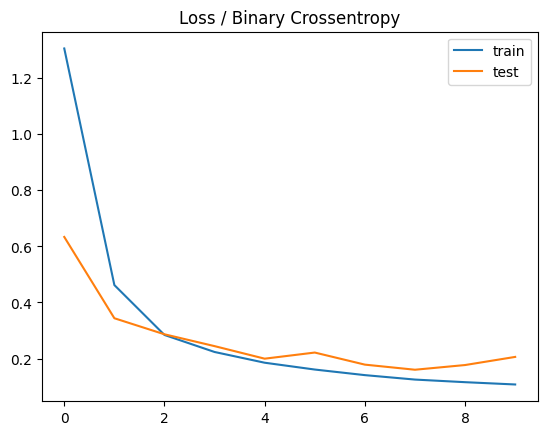

In [ ]:

plt.title('Loss / Binary Crossentropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
############################# best model
#Creating the model-1
model_one = keras.models.Sequential()
model_one.add(keras.layers.Flatten(input_shape=[28, 28]))
model_one.add(keras.layers.Dense(100, activation="relu"))
model_one.add(keras.layers.Dense(50, activation="relu"))
model_one.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model_one.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               78500     
                                                                 
 dense_15 (Dense)            (None, 50)                5050      
                                                                 
 dense_16 (Dense)            (None, 10)                510       
                                                                 
Total params: 84060 (328.36 KB)
Trainable params: 84060 (328.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
model_one.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Fit or Train the model
history = model_one.fit(X_train_nn, y_train, epochs=10, validation_data=(X_val_nn, y_val))

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4580 - accuracy: 0.7976 - val_loss: 0.4758 - val_accuracy: 0.8977
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3524 - accuracy: 0.9096 - val_loss: 0.3247 - val_accuracy: 0.9229
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2445 - accuracy: 0.9348 - val_loss: 0.2513 - val_accuracy: 0.9310
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1868 - accuracy: 0.9486 - val_loss: 0.2020 - val_accuracy: 0.9501
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1545 - accuracy: 0.9575 - val_loss: 0.1740 - val_accuracy: 0.9574
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1438 - accuracy: 0.9601 - val_loss: 0.1914 - val_accuracy: 0.9485
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1170 - accuracy: 0.9665 - val_loss: 0.1631 - val_accuracy:

In [ ]:
# Evaluate the model
loss, accuracy = model_one.evaluate(X_test_nn, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 0s 2ms/step - loss: 0.1816 - accuracy: 0.9604
Test Loss: 0.18159335851669312
Test Accuracy: 0.9603999853134155


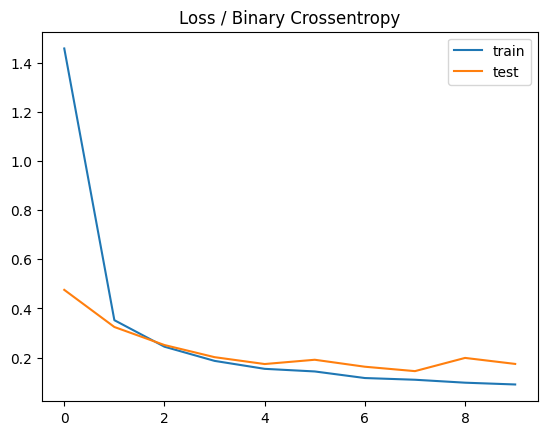

In [ ]:
plt.title('Loss / Binary Crossentropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
#Creating the model 3
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(64, activation="tanh"))
model.add(keras.layers.Dense(32, activation="tanh"))
model.add(keras.layers.Dense(18, activation="tanh"))
model.add(keras.layers.Dense(8, activation="tanh"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 18)                594       
                                                                 
 dense_12 (Dense)            (None, 8)                 152       
                                                                 
 dense_13 (Dense)            (None, 10)                90        
                                                                 
 flatten_5 (Flatten)         (None, 10)               

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Fit or Train the model
history = model.fit(X_train_nn, y_train, epochs=10, validation_data=(X_val_nn, y_val))

Epoch 1/10
1563/1563 [==============================] - 7s 3ms/step - loss: 0.4225 - accuracy: 0.9480 - val_loss: 0.2748 - val_accuracy: 0.9561
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2210 - accuracy: 0.9614 - val_loss: 0.2544 - val_accuracy: 0.9521
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1789 - accuracy: 0.9662 - val_loss: 0.2309 - val_accuracy: 0.9564
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1781 - accuracy: 0.9634 - val_loss: 0.2036 - val_accuracy: 0.9585
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1528 - accuracy: 0.9677 - val_loss: 0.1925 - val_accuracy: 0.9611
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1399 - accuracy: 0.9703 - val_loss: 0.1704 - val_accuracy: 0.9617
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1243 - accuracy: 0.9728 - val_loss: 0.1761 - val_accuracy:

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_nn, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1908 - accuracy: 0.9604
Test Loss: 0.190826877951622
Test Accuracy: 0.9603999853134155


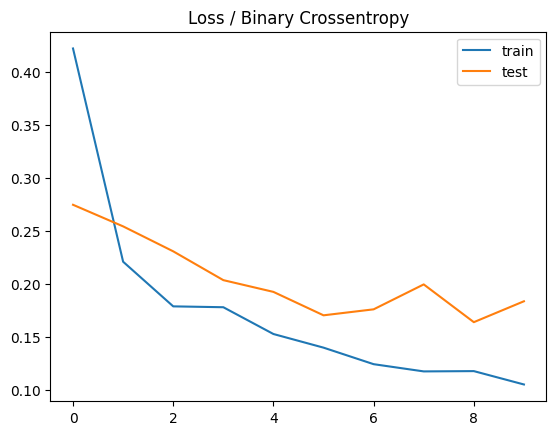

In [ ]:

plt.title('Loss / Binary Crossentropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
#model 4

from tensorflow import keras
# Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(128, activation="tanh"),
    keras.layers.Dropout(0.3),  # Dropout layer with dropout rate of 0.2
    keras.layers.BatchNormalization(),  # Batch normalization layer
    keras.layers.Dense(64, activation="tanh"),
    keras.layers.Dropout(0.3),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation="tanh"),
    keras.layers.Dropout(0.3),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(15, activation="tanh"),
    keras.layers.Dropout(0.3),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])




In [ ]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_23 (Dense)            (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                      

In [ ]:
# Fit or Train the model
history = model.fit(X_train_nn, y_train, epochs=10, validation_data=(X_val_nn, y_val))

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5753 - accuracy: 0.4508 - val_loss: 0.8264 - val_accuracy: 0.7407
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1153 - accuracy: 0.6256 - val_loss: 0.6510 - val_accuracy: 0.8076
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9681 - accuracy: 0.6873 - val_loss: 0.6033 - val_accuracy: 0.8126
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9586 - accuracy: 0.7002 - val_loss: 0.5397 - val_accuracy: 0.8368
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8880 - accuracy: 0.7230 - val_loss: 0.4833 - val_accuracy: 0.8588
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8565 - accuracy: 0.7400 - val_loss: 0.4468 - val_accuracy: 0.8702
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8358 - accuracy: 0.7469 - val_loss: 0.4370 - val_accuracy:

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_nn, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.4290 - accuracy: 0.8773
Test Loss: 0.42897647619247437
Test Accuracy: 0.8773000240325928


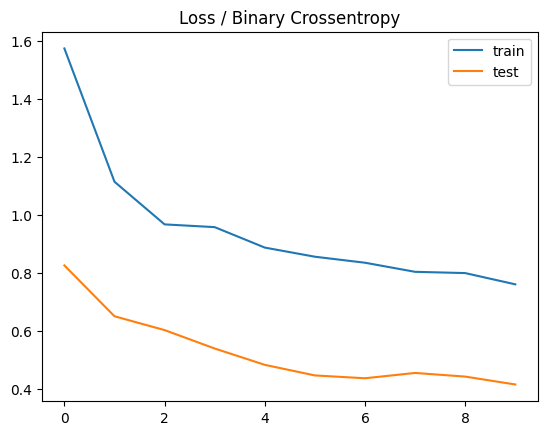

In [ ]:
plt.title('Loss / Binary Crossentropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Hyperparameter Tuning and Overfitting Mitigation

In [ ]:
tf.keras.backend.clear_session()


In [ ]:
import sys
if "google.colab" in sys.modules:
    %pip install -q -U keras_tuner

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal
import keras_tuner as kt


def build_model(hp):
    model = Sequential([
        Flatten(input_shape=[28, 28]),
        Dense(units=hp.Choice('units_1', values=[50, 100, 200]), activation='relu'),
        Dense(units=hp.Choice('units_2', values=[25, 50, 100]), activation='relu'),
        Dense(10, activation="softmax")
    ])
    optimizer = Adam(learning_rate=hp.Choice('learning_rate', values=[3e-4, 3e-3, 3e-2]))
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer,
                  metrics=["accuracy"])
    return model

# Define the tuner
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=10,
                        directory='ML_data',
                        project_name='mnist_task')

tuner.search(X_train_nn, y_train, epochs=5, validation_split=0.2)

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]

# Get the values of the best hyperparameters
best_units_1 = best_hps.get('units_1')
best_units_2 = best_hps.get('units_2')
best_learning_rate = best_hps.get('learning_rate')

# Print the best hyperparameters
print("Best Hyperparameters:")
print(f"Units 1: {best_units_1}")
print(f"Units 2: {best_units_2}")
print(f"Learning Rate: {best_learning_rate}")

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the model
model.fit(X_train_nn, y_train, epochs=5, validation_split=0.2)

# Evaluate the model
_, accuracy = model.evaluate(X_test_nn, y_test)

# Print the accuracy
print("Accuracy:", accuracy)


Reloading Tuner from ML_data/mnist_task/tuner0.json
Best Hyperparameters:
Units 1: 200
Units 2: 100
Learning Rate: 0.003
Epoch 1/5
1250/1250 [==============================] - 10s 7ms/step - loss: 1.7811 - accuracy: 0.8741 - val_loss: 0.3070 - val_accuracy: 0.9228
Epoch 2/5
1250/1250 [==============================] - 12s 9ms/step - loss: 0.2499 - accuracy: 0.9327 - val_loss: 0.2247 - val_accuracy: 0.9420
Epoch 3/5
1250/1250 [==============================] - 11s 9ms/step - loss: 0.2338 - accuracy: 0.9373 - val_loss: 0.2348 - val_accuracy: 0.9353
Epoch 4/5
1250/1250 [==============================] - 9s 7ms/step - loss: 0.2412 - accuracy: 0.9372 - val_loss: 0.2292 - val_accuracy: 0.9380
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2845 - accuracy: 0.9384
Accuracy: 0.9383999705314636


In [ ]:
loss, tuned_accuracy = model.evaluate(X_test_nn, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", tuned_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.2845 - accuracy: 0.9384
Test Loss: 0.2844981849193573
Test Accuracy: 0.9383999705314636


In [ ]:
print("Tuned model accuracy:", tuned_accuracy)
print("Baseline model accuracy:", baseline_accuracy)
print("Ensemble model accuracy:", ensemble_accuracy)

Tuned model accuracy: 0.9383999705314636
Baseline model accuracy: 0.9158
Ensemble model accuracy: 0.8114


# Feature Transformation and Visualization

PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f'Total number of components used after PCA: {pca.n_components_}')

print(f'Train data shape after PCA: {X_train_pca.shape}')
print(f'Test data shape after PCA: {X_test_pca.shape}')

X_train_pca_nn = X_train_pca.reshape(-1, X_train_pca.shape[1], 1)
X_test_pca_nn = X_test_pca.reshape(-1, X_train_pca.shape[1], 1)

model_pca = keras.models.Sequential([
    keras.layers.Input(shape=X_train_pca_nn.shape[1:]),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_pca.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model on PCA-transformed data
history_pca = model_pca.fit(X_train_pca_nn, y_train, epochs=10, batch_size=64, validation_data=(X_test_pca_nn, y_test))

# Evaluate the model
test_loss_pca, test_accuracy_pca = model_pca.evaluate(X_test_pca_nn, y_test)
print("Test Loss (PCA):", test_loss_pca)
print("Test Accuracy (PCA):", test_accuracy_pca)


Total number of components used after PCA: 327
Train data shape after PCA: (50000, 327)
Test data shape after PCA: (10000, 327)
Epoch 1/10
782/782 [==============================] - 7s 7ms/step - loss: 0.4188 - accuracy: 0.8854 - val_loss: 0.3372 - val_accuracy: 0.9409
Epoch 2/10
782/782 [==============================] - 8s 10ms/step - loss: 0.1524 - accuracy: 0.9580 - val_loss: 0.3211 - val_accuracy: 0.9509
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 0.1094 - accuracy: 0.9693 - val_loss: 0.3068 - val_accuracy: 0.9527
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 0.0841 - accuracy: 0.9775 - val_loss: 0.2963 - val_accuracy: 0.9603
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0601 - accuracy: 0.9837 - val_loss: 0.3267 - val_accuracy: 0.9617
Epoch 6/10
782/782 [==============================] - 4s 4ms/step - loss: 0.0546 - accuracy: 0.9863 - val_loss: 0.3395 - val_accuracy: 0.9595
Epoch 7/10
782/782 

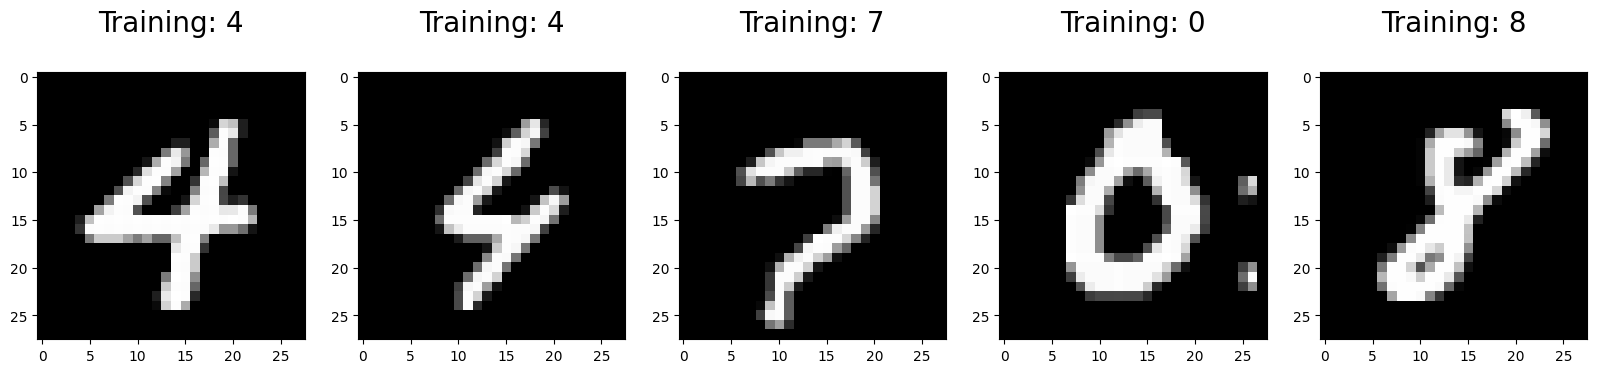

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

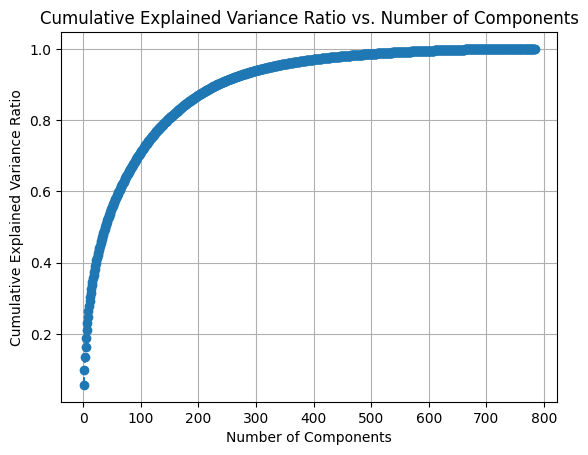

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X_train_scaled)

plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()


#t-SNE

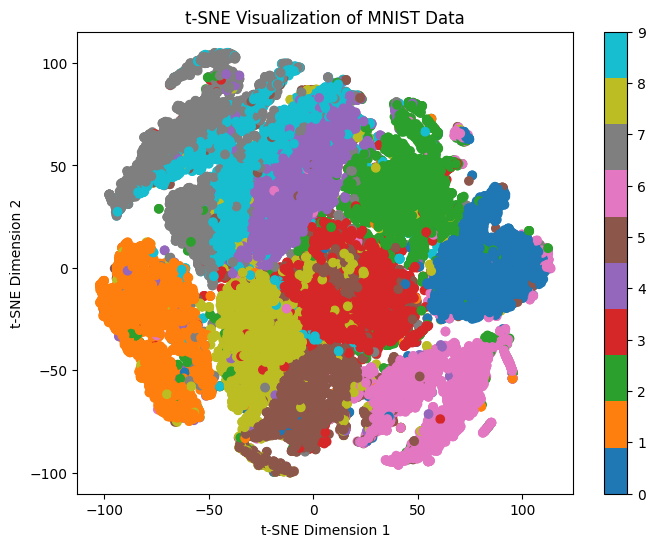

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='tab10')
plt.colorbar()
plt.title("t-SNE Visualization of MNIST Data")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


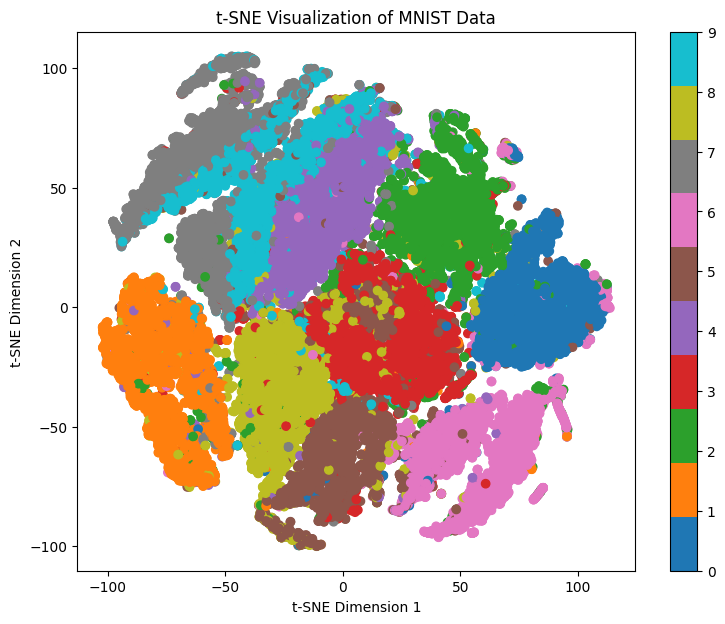

In [ ]:
# Plot the t-SNE visualization
plt.figure(figsize=(9, 7))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='tab10')
plt.colorbar()
plt.title("t-SNE Visualization of MNIST Data")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


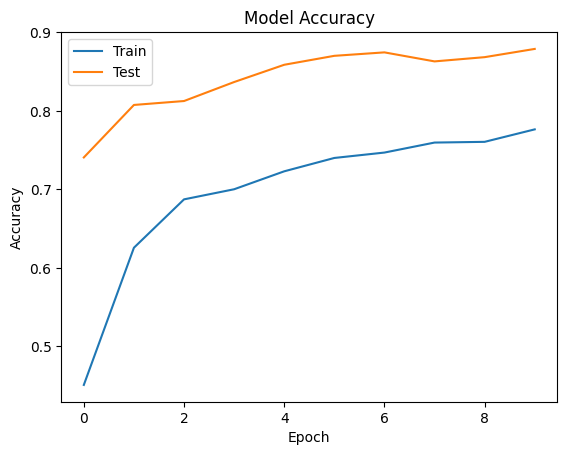

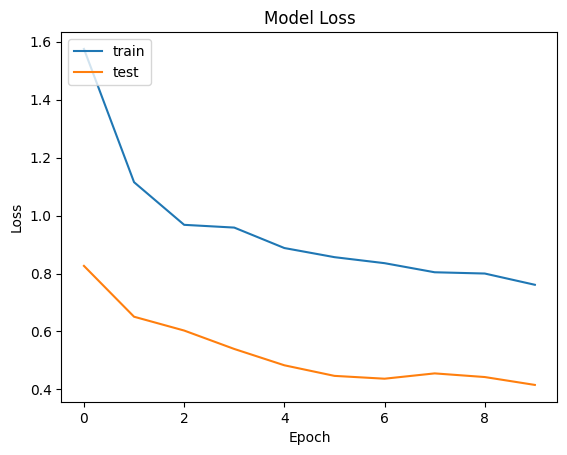

In [ ]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Model_loss.png')
plt.show()